In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Curve fitting

\begin{equation}
RMSE=\sqrt{\frac{1}{n}\sum{(y-\hat{y})^2}}\\
R^2=1-\frac{\sum{(y-\hat{y})^2}}{\sum{(y-\bar{y})^2}}
\end{equation}

## Example:

### 1.Fit gas equation
\begin{equation}
PV^\gamma=constant(K)\\
logP=logK-\gamma logV\\
y=a+bx
\end{equation}

In [2]:
df = pd.read_excel('data/gas.xlsx')
df

,volume(cm3),pressure(gm/cm2)
0,54.3,61.2
1,61.8,49.2
2,72.4,37.6
3,88.7,28.4
4,118.6,19.2
5,194.0,10.1


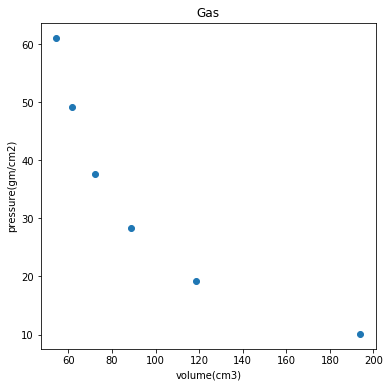

In [3]:
plt.figure(figsize = [6,6])
plt.scatter(df['volume(cm3)'],df['pressure(gm/cm2)'])
plt.xlabel('volume(cm3)')
plt.ylabel('pressure(gm/cm2)')
plt.title('Gas')
plt.show()

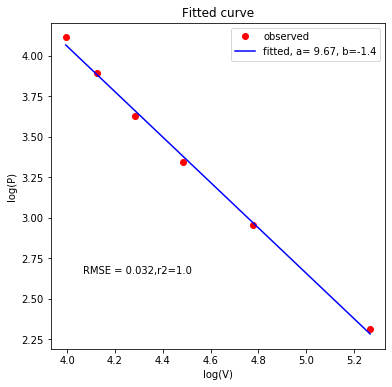

gamma = 1.4
K= 1.6e+04


In [4]:
n=6
x=np.log(df['volume(cm3)'])
y=np.log(df['pressure(gm/cm2)'])
z=np.polyfit(x, y, 1) # linear  fit =y=a+bx
p=np.poly1d(z)  #  [a,b]
ey=p(x) # expected value
a="{:.3}".format(p[0])
b="{:.3}".format(p[1])
K=np.exp(p[0])
gamma=p[1]

RMSE=np.sqrt(np.sum((y-ey)**2)/n)
R_square=1-(np.sum(np.sum(np.sum((y-ey)**2))/np.sum((y-np.mean(y))**2)))
rmse="{:.2}".format(RMSE)
r2="{:.2}".format(R_square)


plt.figure(figsize = [6,6])
plt.plot(x, y, 'ro',label='observed')
plt.plot(x, ey, 'b-',label='fitted, a= '+str(a)+', b='+str(b))
plt.xlabel('log(V)')
plt.ylabel('log(P)')
plt.figtext(0.2, 0.3, 'RMSE = '+str(rmse)+',r2='+str(r2))
plt.legend()
plt.title('Fitted curve')
plt.show()
print('gamma =',"{:.2}".format(-gamma))
print('K=',"{:.2}".format(K))


### 2.Fit 
\begin{equation}
f(\theta)=A+B\cos\theta+C\cos^2\theta\\
y=A+Bx+Cx^2
\end{equation}

In [5]:
df1 = pd.read_excel('data/scattering.xlsx')
df1

,theta(degree),f(theta)
0,30,11
1,45,13
2,90,16
3,120,17
4,150,14


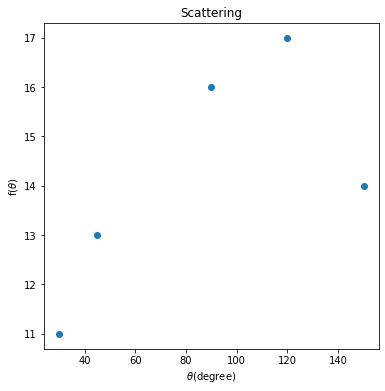

In [6]:
plt.figure(figsize = [6,6])
plt.scatter(df1['theta(degree)'],df1['f(theta)'])
plt.xlabel(r'$\theta$(degree)')
plt.ylabel(r'f($\theta$)')
plt.title('Scattering')
plt.show()

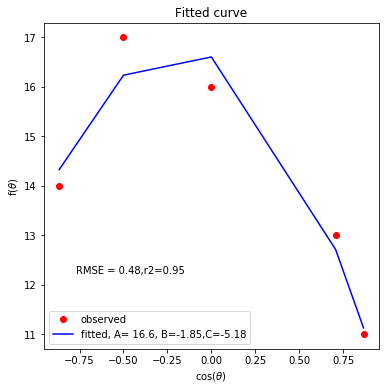

In [7]:
n1=5
x1=np.cos(df1['theta(degree)']*np.pi/180)
y1=df1['f(theta)']
z1=np.polyfit(x1, y1, 2) # second order  fit y=a+bx+cx2
p1=np.poly1d(z1)  #  [c,b,a]
ey1=p1(x1) #expected value
A="{:.3}".format(p1[0])
B="{:.3}".format(p1[1])
C="{:.3}".format(p1[2])


RMSE1=np.sqrt(np.sum((y1-ey1)**2)/n1)
R_square1=1-(np.sum(np.sum(np.sum((y1-ey1)**2))/np.sum((y1-np.mean(y1))**2)))
rmse1="{:.2}".format(RMSE1)
r21="{:.2}".format(R_square1)


plt.figure(figsize = [6,6])
plt.plot(x1, y1, 'ro',label='observed')
plt.plot(x1, ey1, 'b-',label='fitted, A= '+str(A)+', B='+str(B)+',C='+str(C))
plt.xlabel(r'cos($\theta$)')
plt.ylabel(r'f($\theta$)')
plt.figtext(0.2, 0.3, 'RMSE = '+str(rmse1)+',r2='+str(r21))
plt.legend()
plt.title('Fitted curve')
plt.show()


### 3.Determination of decay conctant and half life
\begin{equation}
N=N_0~e^{-\lambda~t}\\
logN=logN_0-\lambda~t\\
y=A+BX
\end{equation}

In [8]:
df2 = pd.read_excel('data/env-dec.xlsx')
df2

,t [s],N [s-1]
0,0,32
1,5,28
2,10,29
3,15,28
4,20,25
...,...,...
78,390,1
79,395,1
80,400,2
81,405,2


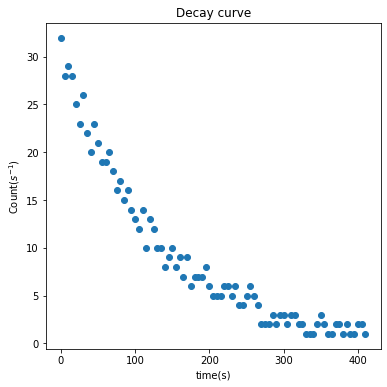

In [9]:
plt.figure(figsize = [6,6])
plt.scatter(df2['t [s]'],df2['N [s-1]'])
plt.xlabel('time(s)')
plt.ylabel('Count($s^{-1}$)')
plt.title('Decay curve')
plt.show()

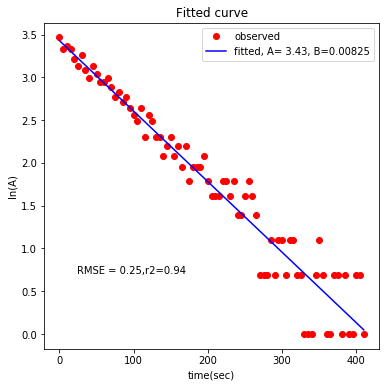

In [10]:
n2=83
x2=df2['t [s]']
y2=np.log(df2['N [s-1]'])
z2=np.polyfit(x2, y2, 1) # second order  fit y=a+bx
p2=np.poly1d(z2)  #  [c,b,a]
ey2=p2(x2) #expected value
A1="{:.3}".format(p2[0])
B1="{:.3}".format(-p2[1])


RMSE2=np.sqrt(np.sum((y2-ey2)**2)/n2)
R_square2=1-(np.sum(np.sum(np.sum((y2-ey2)**2))/np.sum((y2-np.mean(y2))**2)))
rmse2="{:.2}".format(RMSE2)
r22="{:.2}".format(R_square2)


plt.figure(figsize = [6,6])
plt.plot(x2, y2, 'ro',label='observed')
plt.plot(x2, ey2, 'b-',label='fitted, A= '+str(A1)+', B='+str(B1))
plt.xlabel('time(sec)')
plt.ylabel('ln(A)')
plt.figtext(0.2, 0.3, 'RMSE = '+str(rmse2)+',r2='+str(r22))
plt.legend()
plt.title('Fitted curve')
plt.show()

In [11]:
print('decay constant =%0.6f /sec'%-p2[1])

decay constant =0.008246 /sec


In [12]:
T=-0.693/p2[1]
print('half life = %0.2f sec'%T)

half life = 84.04 sec


### 4.Absorption of coefficient
\begin{equation}
N=N_0~e^{-\mu~x}\\
logN=logN_0-\mu~x\\
y=A+BX
\end{equation}

In [13]:
df3 = pd.read_excel('data/env-beta.xlsx')
df3

,n,N [s-1]
0,0,8.0
1,1,6.0
2,2,5.0
3,3,4.0
4,4,3.0
5,5,2.0
6,6,2.0
7,7,2.0
8,8,2.0
9,9,1.0


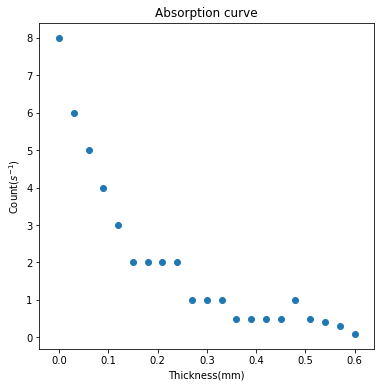

In [14]:
plt.figure(figsize = [6,6])
plt.scatter(0.03*df3['n'],df3['N [s-1]'])# one sheet of Al is 0.03 mm thick
plt.xlabel('Thickness(mm)')
plt.ylabel('Count($s^{-1}$)')
plt.title('Absorption curve')
plt.show()

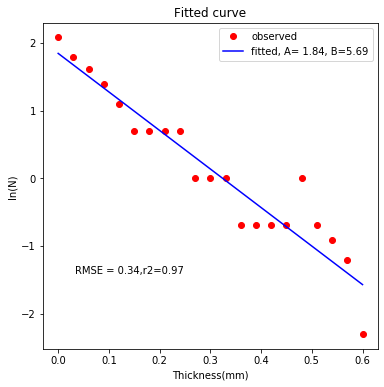

In [15]:
n3=20
x3=0.03*df3['n']
y3=np.log(df3['N [s-1]'])
z3=np.polyfit(x3, y3, 1) # second order  fit y=a+bx
p3=np.poly1d(z3)  #  [c,b,a]
ey3=p3(x3) #expected value
A2="{:.3}".format(p3[0])
B2="{:.3}".format(-p3[1])


RMSE3=np.sqrt(np.sum((y3-ey3)**2)/n3)
R_square3=1-(np.sum(np.sum(np.sum((y3-ey3)**2))/np.sum((y3-np.mean(y2))**2)))
rmse3="{:.2}".format(RMSE3)
r23="{:.2}".format(R_square3)


plt.figure(figsize = [6,6])
plt.plot(x3, y3, 'ro',label='observed')
plt.plot(x3, ey3, 'b-',label='fitted, A= '+str(A2)+', B='+str(B2))
plt.xlabel('Thickness(mm)')
plt.ylabel('ln(N)')
plt.figtext(0.2, 0.3, 'RMSE = '+str(rmse3)+',r2='+str(r23))
plt.legend()
plt.title('Fitted curve')
plt.show()

In [16]:
print('absorption coefficient =%0.3f /mm'%-p3[1])

absorption coefficient =5.695 /mm


In [17]:
density=2.7 # in cgs
mu_m=-10*p3[1]/density # in cgs
print('mass absorption coefficient =%0.3f sq.cm/gm'%mu_m)

mass absorption coefficient =21.091 sq.cm/gm
